In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  

%matplotlib inline
import plotly.express as px
import hashlib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

#### the sample dataset had sensitive data that was processed and anonymized
#### start from the cell labeled Load dataset

#### The objective will be to explore the possible clusters and export some observations to then use plotly which are in the .py files.

In [ ]:
# df_raw = pd.read_csv('./dataset/vendas_teste_v2.csv',delimiter=';',quotechar='"', dtype={"cpf_cnpj_consumidor":"string"})
# df_raw['data_hora']=pd.to_datetime(df_raw['data_hora'], dayfirst=True)
# df_raw.drop(columns=['cpf_cnpj_clube_promocoes','desconto_rateado_cupom','desconto', 
#                                   'acrescimo_rateado_cupom','pdv','cnpj_loja'], inplace=True)
# df_vendas = df_raw.copy()
# print(df_vendas.head())

# remove df_raw of memory
# del df_raw

   numero_cupom_nota           data_hora  codigo_interno_produto  \
0              68279 2019-03-01 07:33:02                   39771   
1              68280 2019-03-01 07:35:55                   36838   
2              68280 2019-03-01 07:35:55                   28377   
3              68280 2019-03-01 07:35:55                   33598   
4              68280 2019-03-01 07:35:55                   35828   

                        descricao embalagem  valor_unitario_produto  \
0  CIG PM CHESTERFIELD BOX ORIGIN        UN                    6.00   
1   PAO VISCONTI 400G FORMA INTEG        UN                    5.69   
2          LOMBO COZIDO AURORA KG        KG                   36.49   
3           QJ CHEDDAR FATIADO KG        KG                   29.90   
4  BOLO PULLMAN PINGUINOS 80G CHO        UN                    2.95   

   quantidade  valor_total  grupo nome_grupo  familia        nome_familia  \
0       1.000         6.00      3      GERAL       11            CHEK OUT   
1       1.

In [ ]:
#show columns isna or isempty or isnull
# df_vendas.isna().any()

numero_cupom_nota         False
data_hora                 False
codigo_interno_produto    False
descricao                 False
embalagem                 False
valor_unitario_produto    False
quantidade                False
valor_total               False
grupo                     False
nome_grupo                False
familia                   False
nome_familia              False
sub_familia               False
nome_sub_familia          False
cpf_cnpj_consumidor        True
dtype: bool

In [ ]:
# cleaning cpf_cnpj_consumidor
# df_vendas['cpf_cnpj_consumidor'] = df_vendas['cpf_cnpj_consumidor'].str.replace('.','').str.replace('-','').str.replace('/','')
# df_vendas['cpf_cnpj_consumidor'] = df_vendas['cpf_cnpj_consumidor'].str.zfill(14)

# set value zero to cpf_cnpj_consumidor if it isna
# df_vendas.loc[df_vendas['cpf_cnpj_consumidor'].isna(), 'cpf_cnpj_consumidor'] = '0'
# df_vendas['cpf_cnpj_consumidor'] = df_vendas['cpf_cnpj_consumidor'].astype(str)

In [ ]:
# anonymize cpf_cnpj_consumidor if diferent of zero
# df_vendas['cpf_cnpj_consumidor'] = df_vendas['cpf_cnpj_consumidor'].apply(lambda x: hashlib.md5(x.encode()).hexdigest() if x != '0' else x)
# df_vendas[df_vendas['cpf_cnpj_consumidor'] != '0'].head()

,numero_cupom_nota,data_hora,codigo_interno_produto,descricao,embalagem,valor_unitario_produto,quantidade,valor_total,grupo,nome_grupo,familia,nome_familia,sub_familia,nome_sub_familia,cpf_cnpj_consumidor
76,68290,2019-03-01 08:19:19,35597,CREME D LEITE QUATA 200G,UN,2.15,1.0,2.15,3,GERAL,17,FESTINHA ALIMENTOS,190,CREME LEITE,ceeeb61b6c789930a214d641989d4f90
77,68290,2019-03-01 08:19:19,2508,LEITE D COCO MENINA 200ML,UN,2.19,1.0,2.19,3,GERAL,17,FESTINHA ALIMENTOS,192,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90
78,68290,2019-03-01 08:19:19,2508,LEITE D COCO MENINA 200ML,UN,2.19,1.0,2.19,3,GERAL,17,FESTINHA ALIMENTOS,192,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90
79,68290,2019-03-01 08:19:19,2508,LEITE D COCO MENINA 200ML,UN,2.19,1.0,2.19,3,GERAL,17,FESTINHA ALIMENTOS,192,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90
80,68290,2019-03-01 08:19:19,28685,MILHO P PIPOCA KISABOR 500G,UN,2.79,1.0,2.79,3,GERAL,19,ENVAZADOS,223,MILHO,ceeeb61b6c789930a214d641989d4f90


## Export dataset

In [ ]:
#df_vendas.drop(columns=['grupo','familia','sub_familia'], inplace=True)

# create a new columns with year, month, day, hour and day of week
# df_vendas['mes'] = df_vendas.data_hora.dt.to_period('M').astype(str)
# df_vendas['hora'] = df_vendas.data_hora.dt.to_period('H').astype(str)
# df_vendas['dia_semana'] = df_vendas['data_hora'].dt.dayofweek
# df_vendas.to_csv('./dataset/vendas.csv', index=False)

### Load dataset - start execution here

In [7]:
df_vendas = pd.read_csv('./dataset/vendas.csv', dtype={"cpf_cnpj_consumidor":"string"})
df_vendas.head()


,numero_cupom_nota,data_hora,codigo_interno_produto,descricao,embalagem,valor_unitario_produto,quantidade,valor_total,grupo,nome_grupo,familia,nome_familia,sub_familia,nome_sub_familia,cpf_cnpj_consumidor,mes,hora,dia_semana
0,68279,2019-03-01 07:33:02,39771,CIG PM CHESTERFIELD BOX ORIGIN,UN,6.00,1.000,6.00,3,GERAL,11,CHEK OUT,144,CIGARROS,0,2019-03,2019-03-01 07:00,4
1,68280,2019-03-01 07:35:55,36838,PAO VISCONTI 400G FORMA INTEG,UN,5.69,1.000,5.69,3,GERAL,24,PAES/BOLOS/CAFE,253,PAES SALGADOS,0,2019-03,2019-03-01 07:00,4
2,68280,2019-03-01 07:35:55,28377,LOMBO COZIDO AURORA KG,KG,36.49,0.066,2.41,3,GERAL,25,FRIOS E LATICINIOS,280,TENDER/LOMBO,0,2019-03,2019-03-01 07:00,4
3,68280,2019-03-01 07:35:55,33598,QJ CHEDDAR FATIADO KG,KG,29.90,0.126,3.77,3,GERAL,7,HORTIFRUTI,108,FRUTAS,0,2019-03,2019-03-01 07:00,4
4,68280,2019-03-01 07:35:55,35828,BOLO PULLMAN PINGUINOS 80G CHO,UN,2.95,1.000,2.95,3,GERAL,17,FESTINHA ALIMENTOS,200,BOLO,0,2019-03,2019-03-01 07:00,4


### Export dataset with cpf_cnpj_consumidor > 0

In [8]:
df_clientes_cpf = df_vendas[df_vendas['cpf_cnpj_consumidor'] != '0']
df_clientes_cpf.drop(columns=['valor_total','codigo_interno_produto','valor_unitario_produto',
                    'valor_total','codigo_interno_produto','valor_unitario_produto',
                     'sub_familia','familia','nome_familia'], inplace=True)
df_clientes_cpf.to_csv('./dataset/itens_consumidor.csv', index=False)

df_clientes_cpf.head()

,numero_cupom_nota,data_hora,descricao,embalagem,quantidade,grupo,nome_grupo,nome_sub_familia,cpf_cnpj_consumidor,mes,hora,dia_semana
76,68290,2019-03-01 08:19:19,CREME D LEITE QUATA 200G,UN,1.0,3,GERAL,CREME LEITE,ceeeb61b6c789930a214d641989d4f90,2019-03,2019-03-01 08:00,4
77,68290,2019-03-01 08:19:19,LEITE D COCO MENINA 200ML,UN,1.0,3,GERAL,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90,2019-03,2019-03-01 08:00,4
78,68290,2019-03-01 08:19:19,LEITE D COCO MENINA 200ML,UN,1.0,3,GERAL,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90,2019-03,2019-03-01 08:00,4
79,68290,2019-03-01 08:19:19,LEITE D COCO MENINA 200ML,UN,1.0,3,GERAL,COCO RALADO/LEITE,ceeeb61b6c789930a214d641989d4f90,2019-03,2019-03-01 08:00,4
80,68290,2019-03-01 08:19:19,MILHO P PIPOCA KISABOR 500G,UN,1.0,3,GERAL,MILHO,ceeeb61b6c789930a214d641989d4f90,2019-03,2019-03-01 08:00,4


### basic statistic | medium ticket

In [9]:

df_ticket = df_vendas.groupby(['numero_cupom_nota'])['valor_total'].sum().reset_index()
df_ticket = df_ticket.sort_values('valor_total', ascending=False)

percentil = df_ticket.valor_total.quantile(.25)
print('1 a 25% : ',percentil)

percentil = df_ticket.valor_total.quantile(.50)
print('ate 50%: ',percentil)
percentil = df_ticket.valor_total.median()
print('Mediana: ',percentil)

percentil = df_ticket.valor_total.quantile(.75)
print('ate 75%: ',percentil)

percentil = df_ticket.valor_total.mean()
print('Media: ',percentil)

percentil = df_ticket.valor_total.quantile(1)
print('Ticket Max: ',percentil)

percentil = df_ticket.valor_total.quantile(.90)
print('90%: ',round(percentil,2))

df_ticket[df_ticket.valor_total >= percentil]


1 a 25% :  10.74
ate 50%:  23.8
Mediana:  23.8
ate 75%:  47.53
Media:  38.67658565283896
Ticket Max:  1963.29
90%:  86.04


,numero_cupom_nota,valor_total
119,22633,1963.29
3462,25980,1889.41
7808,30332,1286.18
31948,147734,1210.71
1888,24406,1087.62
...,...,...
26103,85366,86.04
56093,227508,86.04
25245,83538,86.04
73101,245788,86.04


### 25%, 50%,75% e mediana-> SubCategorias vendidas

In [10]:
df_group_venda_subfam = df_vendas.groupby(['nome_sub_familia'])['quantidade'].count().reset_index()
df_group_venda_subfam = df_group_venda_subfam.sort_values('quantidade', ascending=False)

percentil = df_group_venda_subfam.quantidade.quantile(.75)
print(percentil)
df_group_venda_subfam[df_group_venda_subfam.quantidade <= percentil]

1276.0


,nome_sub_familia,quantidade
147,GUARDANAPOS/P.TOALHA,1219
0,ABSORVENTES,1159
113,EXTRATO,1149
118,FARINHA TRIGO,1130
253,SALAME P/FATIAR,1082
...,...,...
97,DETERGENTE GEL,2
78,CORANTE ROUPAS,2
226,PROTETOR SOLAR,2
152,HIGIENE ANIMAL,1


In [11]:
# if error:  Mime type rendering requires nbformat>=4.2.0 but it is not installed
# necessary to run and restart the kernel:

# pip install --upgrade nbformat


In [12]:
# if restart the kernel, necessary to run the code below
# import libs from first cell
# load vendas.csv

# df_vendas = pd.read_csv('./dataset/vendas.csv', dtype={"cpf_cnpj_consumidor":"string"})
# df_vendas.head()


#### Average sales: Per hour, Per day, Week, Month, -> filter Qty and $$

In [13]:

import plotly.offline as plot
import plotly.graph_objs as go

pd.set_option('display.float_format', '{:.2f}'.format)
def get_vendas_por_mes():
    df_result = df_vendas.groupby('mes')['valor_total'].sum()
    return df_result

df_vendas_mes = get_vendas_por_mes()
value_mean = df_vendas_mes.mean()

colors_graph = []
for vl_item in df_vendas_mes.values:
    if vl_item < value_mean:
        colors_graph.append('red')
    else:
        colors_graph.append('green')


data_graph = [
    go.Bar(x=df_vendas_mes.index,
           y=df_vendas_mes.values,
           marker = {'color' : colors_graph},
           opacity=0.7
    )

]

config_graph = go.Layout(title='Vendas por Mês (média mensal: {})'.format(round(value_mean,2)),
                        xaxis={'title':'Período Mensal'},
                        yaxis={'title':'Valores em vendas'}
)

fig = go.Figure(data=data_graph, layout=config_graph)
fig.show()
#plot.iplot(fig, filename='Meses nao superados')

In [14]:
df_vendas_hora = df_vendas.groupby(['mes','hora'])['valor_total'].sum().reset_index()
df_vendas_hora.valor_total.mean()

np.float64(3062.456894409938)

### Representation of the Percentage of Sales by Subfamily vs Total Sales in the period - Sales Frequency and Sales Quantity

In [15]:
# grouping frequency counts by subfamily
df_familia_freq_vendas = df_vendas.groupby(['nome_sub_familia'])['quantidade'].count().reset_index()
df_familia_freq_vendas = df_familia_freq_vendas.reset_index()

# get the grand total of the entire dataframe
df_familia_freq_vendas['total_freq'] = df_vendas.numero_cupom_nota.count()

# calculate the percentage representation of the frequency calculated by subfamily based on the grand total
df_familia_freq_vendas['percent_freq']=(df_familia_freq_vendas['quantidade']/df_familia_freq_vendas['total_freq'])

df_familia_freq_vendas=df_familia_freq_vendas.sort_values(by=['percent_freq'], ascending=False)
#df_familia_freq_vendas=df_familia_freq_vendas[0:30]


#df_familia_freq_vendas[df_familia_freq_vendas['percent_freq']<.05]
#print(df_familia_freq_vendas.median())
#df_familia_freq_vendas.describe()
df_familia_freq_vendas.head()

,index,nome_sub_familia,quantidade,total_freq,percent_freq
133,133,FRUTAS,51803,477485,0.11
164,164,LEGUMES,31441,477485,0.07
225,225,PRODUCAO PROPRIA,30508,477485,0.06
237,237,REFRIGERANTES,23573,477485,0.05
141,141,GERAL ROTISSERIA,23155,477485,0.05


### Export the above dataframe in csv to dash

In [16]:
df_export_to_csv =df_familia_freq_vendas.copy()
df_export_to_csv['percent_freq']=df_export_to_csv['percent_freq'].apply(lambda x: x * 100)
df_export_to_csv.to_csv('./dataset/repres_subfam_freq_total.csv', index=False)

### Representation of Sales Percentage by Subfamily vs Total Sales in the period - Using quantity sold per customer


In [17]:
df_familia_qtd_vendas = df_vendas.groupby(['nome_sub_familia'])['quantidade'].sum().reset_index()
df_familia_qtd_vendas = df_familia_qtd_vendas.reset_index()
# get the grand total of the entire dataframe
df_familia_qtd_vendas['total_qtd'] = df_vendas.quantidade.sum()
# calculate the percentage representation of the frequency calculated by subfamily based on the grand total
df_familia_qtd_vendas['percent_qtd']=(df_familia_qtd_vendas['quantidade']/df_familia_qtd_vendas['total_qtd'])

df_familia_qtd_vendas=df_familia_qtd_vendas.sort_values(by=['percent_qtd'], ascending=False)
df_familia_qtd_vendas.head()

,index,nome_sub_familia,quantidade,total_qtd,percent_qtd
59,59,CERVEJAS LATA,88722.00,572621.61,0.15
133,133,FRUTAS,47067.89,572621.61,0.08
237,237,REFRIGERANTES,28149.00,572621.61,0.05
164,164,LEGUMES,23816.04,572621.61,0.04
43,43,BOVINA,22438.63,572621.61,0.04


In [18]:
df_export_to_csv =df_familia_qtd_vendas.copy()
df_export_to_csv['percent_qtd']=df_export_to_csv['percent_qtd'].apply(lambda x: x * 100)
df_export_to_csv.to_csv('./dataset/repres_subfam_qtd_total.csv', index=False)
df_export_to_csv.head()

,index,nome_sub_familia,quantidade,total_qtd,percent_qtd
59,59,CERVEJAS LATA,88722.00,572621.61,15.49
133,133,FRUTAS,47067.89,572621.61,8.22
237,237,REFRIGERANTES,28149.00,572621.61,4.92
164,164,LEGUMES,23816.04,572621.61,4.16
43,43,BOVINA,22438.63,572621.61,3.92


### Preparing the dataframe for clustering studies

In [19]:
df_vendas = pd.read_csv('./dataset/vendas.csv', dtype={"cpf_cnpj_consumidor":"string"})
df_vendas.head()

,numero_cupom_nota,data_hora,codigo_interno_produto,descricao,embalagem,valor_unitario_produto,quantidade,valor_total,grupo,nome_grupo,familia,nome_familia,sub_familia,nome_sub_familia,cpf_cnpj_consumidor,mes,hora,dia_semana
0,68279,2019-03-01 07:33:02,39771,CIG PM CHESTERFIELD BOX ORIGIN,UN,6.00,1.00,6.00,3,GERAL,11,CHEK OUT,144,CIGARROS,0,2019-03,2019-03-01 07:00,4
1,68280,2019-03-01 07:35:55,36838,PAO VISCONTI 400G FORMA INTEG,UN,5.69,1.00,5.69,3,GERAL,24,PAES/BOLOS/CAFE,253,PAES SALGADOS,0,2019-03,2019-03-01 07:00,4
2,68280,2019-03-01 07:35:55,28377,LOMBO COZIDO AURORA KG,KG,36.49,0.07,2.41,3,GERAL,25,FRIOS E LATICINIOS,280,TENDER/LOMBO,0,2019-03,2019-03-01 07:00,4
3,68280,2019-03-01 07:35:55,33598,QJ CHEDDAR FATIADO KG,KG,29.90,0.13,3.77,3,GERAL,7,HORTIFRUTI,108,FRUTAS,0,2019-03,2019-03-01 07:00,4
4,68280,2019-03-01 07:35:55,35828,BOLO PULLMAN PINGUINOS 80G CHO,UN,2.95,1.00,2.95,3,GERAL,17,FESTINHA ALIMENTOS,200,BOLO,0,2019-03,2019-03-01 07:00,4


### Separate the datasets to analyze sales without consumer identification and with identification

In [20]:
df_compras_anon = df_vendas[df_vendas.cpf_cnpj_consumidor == '0']
print('anonimals count: ',df_compras_anon.numero_cupom_nota.count())

df_identificados = df_vendas[df_vendas.cpf_cnpj_consumidor != '0']
print('identified count: ', df_identificados.numero_cupom_nota.count())

anonimals count:  401040
identified count:  76445


### Comparison of the sample visualizing purchases identified with the consumer ID vs anonymous purchases, and understanding the distribution of the dataset

In [21]:
# dataset only with purchases without consumer identification
df_compras_anon = df_vendas[df_vendas.cpf_cnpj_consumidor == '0']

# purchase frequency by subcategory (with and without CPF)
df_total_subfamilia = df_vendas.groupby('nome_sub_familia')['cpf_cnpj_consumidor'].count().reset_index()
df_total_subfamilia.rename(columns={'cpf_cnpj_consumidor': 'total_frequencia'}, inplace=True)

# purchase frequency for identified consumers only
df_identificados = df_vendas[df_vendas.cpf_cnpj_consumidor != '0']
df_vendas_identificados = df_identificados.groupby('nome_sub_familia')['cpf_cnpj_consumidor'].count().reset_index()
df_vendas_identificados.rename(columns={'cpf_cnpj_consumidor': 'frequencia_identificados'}, inplace=True)

# purchase frequency for anonymous consumers only
df_vendas_anonimas = df_compras_anon.groupby('nome_sub_familia')['cpf_cnpj_consumidor'].count().reset_index()
df_vendas_anonimas.rename(columns={'cpf_cnpj_consumidor': 'frequencia_anonimos'}, inplace=True)

# merge
df_comparacao = df_total_subfamilia.merge(df_vendas_identificados, on='nome_sub_familia', how='left')
df_comparacao = df_comparacao.merge(df_vendas_anonimas, on='nome_sub_familia', how='left')
df_comparacao.fillna(0, inplace=True)

# create comparison columns
df_comparacao['perc_identificados'] = df_comparacao['frequencia_identificados'] / df_comparacao['total_frequencia']
df_comparacao['perc_anonimos'] = df_comparacao['frequencia_anonimos'] / df_comparacao['total_frequencia']
df_comparacao = df_comparacao.sort_values(by='total_frequencia', ascending=False)

df_comparacao.head(20)


# OBS: a large portion of purchases in certain subcategories were made by unidentified consumers. This may affect customer segmentation analysis

,nome_sub_familia,total_frequencia,frequencia_identificados,frequencia_anonimos,perc_identificados,perc_anonimos
133,FRUTAS,51803,10576.00,41227.00,0.20,0.80
164,LEGUMES,31441,6712.00,24729.00,0.21,0.79
225,PRODUCAO PROPRIA,30508,3916.00,26592.00,0.13,0.87
237,REFRIGERANTES,23573,2606.00,20967.00,0.11,0.89
141,GERAL ROTISSERIA,23155,2780.00,20375.00,0.12,0.88
128,FOLHAS,18015,3293.00,14722.00,0.18,0.82
59,CERVEJAS LATA,16568,650.00,15918.00,0.04,0.96
43,BOVINA,14748,2501.00,12247.00,0.17,0.83
37,BISCOITOS DOCES,11210,1942.00,9268.00,0.17,0.83
27,AVES,9079,1581.00,7498.00,0.17,0.83


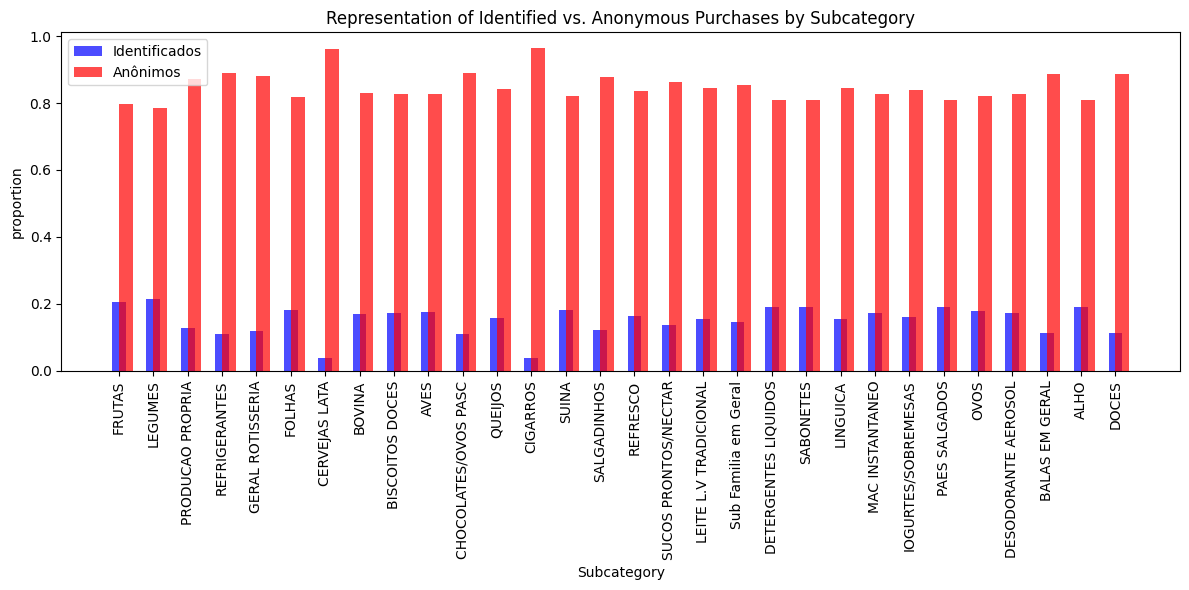

In [22]:
df_comparacao_plot = df_comparacao[:30]

plt.figure(figsize=(12, 6))
plt.bar(df_comparacao_plot['nome_sub_familia'], df_comparacao_plot['perc_identificados'], label='Identificados', alpha=0.7, color='b', width=0.4, align='center')
plt.bar(df_comparacao_plot['nome_sub_familia'], df_comparacao_plot['perc_anonimos'], label='Anônimos', alpha=0.7, color='r', width=0.4, align='edge')

plt.title('Representation of Identified vs. Anonymous Purchases by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('proportion')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


### use a strategy of making separate clusters with identified customers and anonymous sales and then compare

In [23]:
# dataset only with purchases without consumer identification

df_compras_cli = df_vendas[df_vendas.cpf_cnpj_consumidor != '0']
df_compras_cli=df_compras_cli[df_compras_cli['nome_sub_familia'].isin(df_familia_freq_vendas.nome_sub_familia)]

#generate total purchases by frequency of each customer
df_compras_cli_total = df_compras_cli.groupby('cpf_cnpj_consumidor')['quantidade'].count().reset_index()

# if you want to consider the quantity of items purchased
#df_compras_cli_total = df_compras_cli.groupby('cpf_cnpj_consumidor')['quantidade'].sum().reset_index()

df_compras_cli_total.rename(columns = {'quantidade':'total'},inplace=True)

#Grouping customer purchases by subfamily, but considering item frequency
df_compras_cli_group = df_compras_cli.groupby(['cpf_cnpj_consumidor','nome_sub_familia'])['quantidade'].count()

# if you want to consider the quantity of items purchased
#df_compras_cli_group = df_compras_cli.groupby(['cpf_cnpj_consumidor','nome_sub_familia'])['quantidade'].sum()

df_compras_cli_group = df_compras_cli_group.reset_index().sort_values(by=['cpf_cnpj_consumidor','nome_sub_familia'], ascending=True)

#creating df with total summary of purchases made by the consumer and how much each subfamily purchased represents of the total purchases made by him
df_summary_cli=df_compras_cli_group.merge(df_compras_cli_total, how = 'inner', on = 'cpf_cnpj_consumidor')
df_summary_cli['percent_familia'] = df_summary_cli['quantidade'] / df_summary_cli['total']
df_summary_cli=df_summary_cli[df_summary_cli['nome_sub_familia'].isin(df_familia_freq_vendas.nome_sub_familia)]

df_summary_cli

,cpf_cnpj_consumidor,nome_sub_familia,quantidade,total,percent_familia
0,00071fafd118afc323db1b1f7a75892b,ALIMENTO CAES,1,33,0.03
1,00071fafd118afc323db1b1f7a75892b,AVES,5,33,0.15
2,00071fafd118afc323db1b1f7a75892b,BATATAS,1,33,0.03
3,00071fafd118afc323db1b1f7a75892b,BISCOITOS DOCES,1,33,0.03
4,00071fafd118afc323db1b1f7a75892b,BOVINA,1,33,0.03
...,...,...,...,...,...
36654,ffc66c24a0fe4faadf5004b4cc826969,CHICLE/GOMA,1,10,0.10
36655,ffc66c24a0fe4faadf5004b4cc826969,FRUTAS,1,10,0.10
36656,ffc66c24a0fe4faadf5004b4cc826969,ISOTONICOS/ENERGETIC,4,10,0.40
36657,ffc66c24a0fe4faadf5004b4cc826969,LEGUMES,3,10,0.30


### identified anonymous

In [24]:
# dataset only with purchases without consumer identification

df_compras_anonimas = df_vendas[df_vendas.cpf_cnpj_consumidor == '0']
df_compras_anonimas = df_compras_anonimas[df_compras_anonimas['nome_sub_familia'].isin(df_familia_freq_vendas.nome_sub_familia)]

df_compras_anonimas_group = df_compras_anonimas.groupby(['cpf_cnpj_consumidor', 'nome_sub_familia'])['quantidade'].count().reset_index()

df_compras_anonimas_total = df_compras_anonimas.groupby('nome_sub_familia')['quantidade'].sum().reset_index()
df_compras_anonimas_total.rename(columns={'quantidade': 'total'}, inplace=True)

df_summary_anonimas = df_compras_anonimas_group.merge(df_compras_anonimas_total, how='left', on='nome_sub_familia')
df_summary_anonimas['percent_familia'] = df_summary_anonimas['quantidade'] / df_summary_anonimas['total']
df_summary_anonimas = df_summary_anonimas[df_summary_anonimas['nome_sub_familia'].isin(df_familia_freq_vendas.nome_sub_familia)]

# show the summary of purchases made by anonymous consumers
df_summary_anonimas


,cpf_cnpj_consumidor,nome_sub_familia,quantidade,total,percent_familia
0,0,ABSORVENTES,1009,1044.00,0.97
1,0,ACESSORIOS DE PERFUMARIA,558,567.00,0.98
2,0,ACESSORIOS P/ LIMPEZA,1209,1358.00,0.89
3,0,ACESSORIOS P/ANIMAIS,11,13.00,0.85
4,0,ACHOCOLATADO LIGHT,1,1.00,1.00
...,...,...,...,...,...
288,0,VELAS,359,384.00,0.93
289,0,VINAGRE,541,568.00,0.95
290,0,VINHOS,1266,1409.00,0.90
291,0,VODKA,643,800.00,0.80


### Calculate the representativeness of each subcategory considering the percentages of each consumed
### Select subcategories that have a significant representation (example: more than 1% of the total)

In [25]:
subcategoria_representacao = df_summary_cli.groupby('nome_sub_familia')['percent_familia'].sum() / df_summary_cli['percent_familia'].sum()
subcategorias_relevantes = subcategoria_representacao[subcategoria_representacao > 0.01].index

print(subcategorias_relevantes)
df_identificados_relevantes = df_summary_cli[df_summary_cli['nome_sub_familia'].isin(subcategorias_relevantes)]

df_identificados_relevantes

Index(['AVES', 'BISCOITOS DOCES', 'BOVINA', 'CERVEJAS LATA',
       'CHOCOLATES/OVOS PASC', 'DETERGENTES LIQUIDOS', 'FOLHAS', 'FRUTAS',
       'GERAL ROTISSERIA', 'LEGUMES', 'LINGUICA', 'PAES SALGADOS',
       'PRODUCAO PROPRIA', 'QUEIJOS', 'REFRIGERANTES', 'SALGADINHOS',
       'SUCOS PRONTOS/NECTAR', 'SUINA', 'Sub Familia em Geral'],
      dtype='object', name='nome_sub_familia')


,cpf_cnpj_consumidor,nome_sub_familia,quantidade,total,percent_familia
1,00071fafd118afc323db1b1f7a75892b,AVES,5,33,0.15
3,00071fafd118afc323db1b1f7a75892b,BISCOITOS DOCES,1,33,0.03
4,00071fafd118afc323db1b1f7a75892b,BOVINA,1,33,0.03
10,00071fafd118afc323db1b1f7a75892b,LINGUICA,2,33,0.06
12,00071fafd118afc323db1b1f7a75892b,PRODUCAO PROPRIA,2,33,0.06
...,...,...,...,...,...
36645,ffc29701c98710de154606f153229446,PRODUCAO PROPRIA,1,66,0.02
36647,ffc29701c98710de154606f153229446,QUEIJOS,2,66,0.03
36651,ffc29701c98710de154606f153229446,SUCOS PRONTOS/NECTAR,2,66,0.03
36655,ffc66c24a0fe4faadf5004b4cc826969,FRUTAS,1,10,0.10


### transpose the dataset and prepare to find the clusters

In [26]:
# df_pivot_cli = df_summary_cli[['cpf_cnpj_consumidor','nome_sub_familia','percent_familia']].pivot(index = 'cpf_cnpj_consumidor', columns = 'nome_sub_familia', values = 'percent_familia')
df_pivot_cli = df_identificados_relevantes[['cpf_cnpj_consumidor','nome_sub_familia','percent_familia']].pivot(index = 'cpf_cnpj_consumidor', columns = 'nome_sub_familia', values = 'percent_familia')
df_pivot_cli = df_pivot_cli.fillna(value = 0)
print(df_pivot_cli.shape)
df_pivot_cli

(2826, 19)


nome_sub_familia,AVES,BISCOITOS DOCES,BOVINA,CERVEJAS LATA,CHOCOLATES/OVOS PASC,DETERGENTES LIQUIDOS,FOLHAS,FRUTAS,GERAL ROTISSERIA,LEGUMES,LINGUICA,PAES SALGADOS,PRODUCAO PROPRIA,QUEIJOS,REFRIGERANTES,SALGADINHOS,SUCOS PRONTOS/NECTAR,SUINA,Sub Familia em Geral
cpf_cnpj_consumidor,,,,,,,,,,,,,,,,,,,
00071fafd118afc323db1b1f7a75892b,0.15,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.06
003b998d1750a7c1ce7ea9d07dc8fd88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.09,0.00,0.00
00557b371f4c6327b5b3a930543e5bdb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00
005815ee7da8a1f87dfcd0e3846072b2,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.10,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0066bc08514f3f4b997076adfa58a55b,0.12,0.00,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.12,0.12,0.12,0.12,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff5e353526018fba8bc2a34692100e80,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ff62d35d982b395da1eb98157a359ee2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.17,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ff99d1b49494ee559a7ab36051b136de,0.25,0.00,0.44,0.00,0.00,0.00,0.00,0.06,0.00,0.12,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.06,0.00


### normalize the scale of the data that will be used in k-means

In [27]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_pivot_normalized = scaler.fit_transform(df_pivot_cli)

# df_pivot_normalized[:5]

### Using MixMaxScaler because the distributions are different and I want to maintain the proportionality of the original values.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_pivot_normalized = scaler.fit_transform(df_pivot_cli)

df_pivot_normalized[:5]

array([[0.15151515, 0.03030303, 0.03030303, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12121212, 0.        , 0.06060606, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.08754209],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.36363636, 0.        , 0.        ,
        0.        , 0.        , 0.09090909, 0.        , 0.        ,
        0.        , 0.09090909, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.1       , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

## K-Means

In [29]:
def calculate_wcss(data,n_range_start,n_range_stop):
    '''
    Within-Clusters Sum-of-Squares
    
    Função responsável por realizar os cálculos de wcss que serão retornados em array,com isso
        você será capaz de gerar uma visualização usando o método do cotovelo.
    
    data: dataset pivot com as observações para o KMeans
    
    n_range_start: valor inicial para o range de iterações de execução do KMEANS
    
    n_range_stop: valor final para o range de iterações de execução do KMEANS
    
    '''
    wcss = []
    #n_range_stop+=1 # para não dar erro de dimensao quando usado na função viz_wcss 
    for k in range(n_range_start, n_range_stop):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def viz_wcss(n_range_start,n_range_stop,**kwargs):
    '''Função responsável por realizar os cálculos de wcss e gerar o gráfico de cotovelo para melhor visualização e escolha do melhor K.
    
    data: dataset pivot com as observações para o KMeans
    
    n_range_start: valor inicial para o range de iterações de execução do KMEANS
    
    n_range_stop: valor final para o range de iterações de execução do KMEANS
    
    NOTA: O melhor equilíbrio para o melhor K é o ponto da curva mais distante de uma 
    reta traçada entre os pontos de início e fim.
    
    '''
    x1=n_range_start
    x2=n_range_stop
    #intervalo = range(x1,x2+1)
    intervalo = range(x1,x2)
    data = kwargs.get('data', pd.DataFrame())
    wcss = kwargs.get('wcss', None)
    if not data.empty:
        wcss = calculate_wcss(data,n_range_start,n_range_stop)

    plt.figure(figsize=(15,5))
    plt.title('Elbow(Cotovelo)')
    plt.xlabel('Quantidade Clusters')
    plt.ylabel('WCSS (soma intra-cluster)')
    plt.grid()
    plt.xticks(intervalo)
    plt.plot(intervalo, wcss) 
    plt.plot(intervalo, wcss, marker='o') # pontos cada k

    plt.show()

def viz_silhouette_scores(data,n_range_start,n_range_stop):
    from sklearn.metrics import silhouette_score
    '''
    O coeficiente de silhueta indica o quão bem um ponto é agrupado dentro do seu próprio cluster comparado com outros clusters.
     Quanto maior o valor da silhueta, melhor a definição dos clusters.
     
     Observar se o silhouette score atinge um valor máximo em um valor específico de k, esse pode ser o número de clusters ideal.
    
    data: dataset pivot com as observações para o KMeans
    
    n_range_start: valor inicial para o range de iterações de execução do KMEANS
    
    n_range_stop: valor final para o range de iterações de execução do KMEANS
    
    '''
    silhouette_scores = []

    for k in range(n_range_start, n_range_stop):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure(figsize=(10,6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score para diferentes valores de K')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

import math
def optimal_number_of_clusters(wcss):
    '''
    
    A função pode ser usada para encontrar o melhor número do parâmetro K para o KMeans.
    
    wcss: deve ser informado o array com os wcss já calculados
    '''
    x1, y1 = 2, wcss[0]
    x2, y2 = 30, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

### Searchin for the best number of K

In [30]:
n_start=1
n_stop=20
arr_wcss = calculate_wcss(df_pivot_normalized,n_start,n_stop)
arr_wcss

[447.7739542898265,
 413.09108006365864,
 358.1510859647824,
 340.05961599938126,
 302.1205345597989,
 287.5646099246351,
 276.4357432567116,
 259.96046237793394,
 251.2994286404634,
 237.63952339499474,
 228.97979959651474,
 223.4428333331736,
 219.53193099822795,
 210.6247732405513,
 206.3577394036613,
 203.8423718560594,
 198.80816873561082,
 196.36572142244893,
 194.53800049388198]

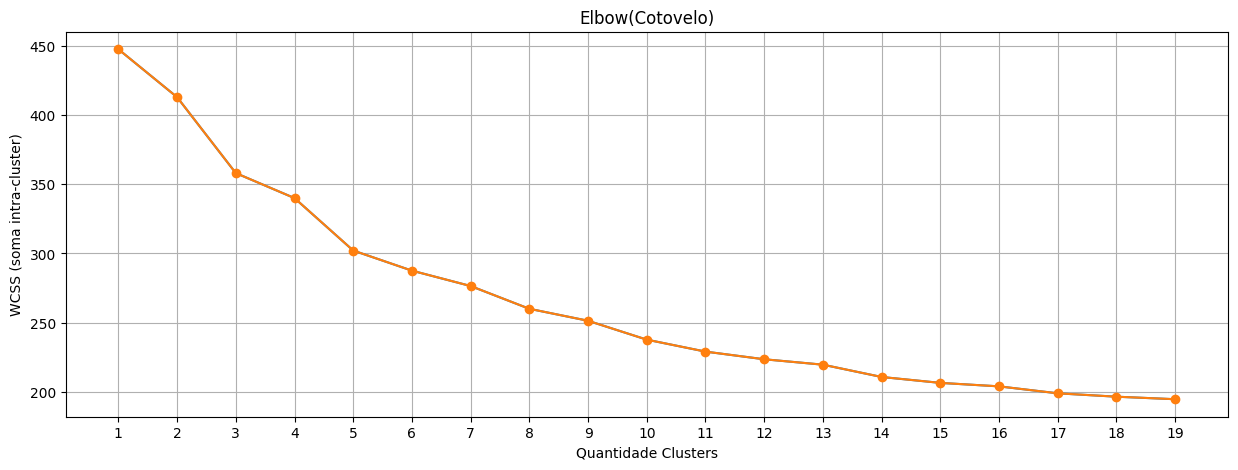

In [31]:
viz_wcss(n_range_start=n_start,n_range_stop=n_stop, wcss=arr_wcss)

In [32]:
n_optimal = optimal_number_of_clusters(arr_wcss)
print('Melhor: {}'.format(n_optimal))

Melhor: 11


In [33]:
print(f"Número de variáveis no dataset: {df_pivot_normalized.shape[1]}")


Número de variáveis no dataset: 19


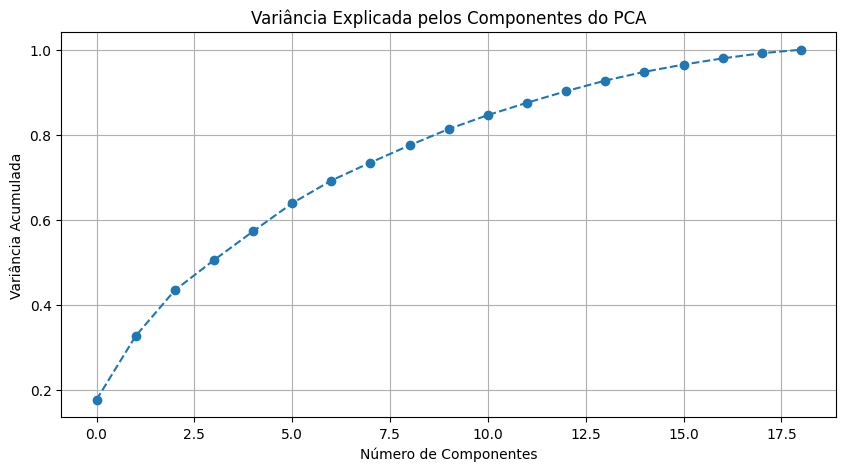

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(df_pivot_normalized)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Explicada pelos Componentes do PCA')
plt.grid()
plt.show()


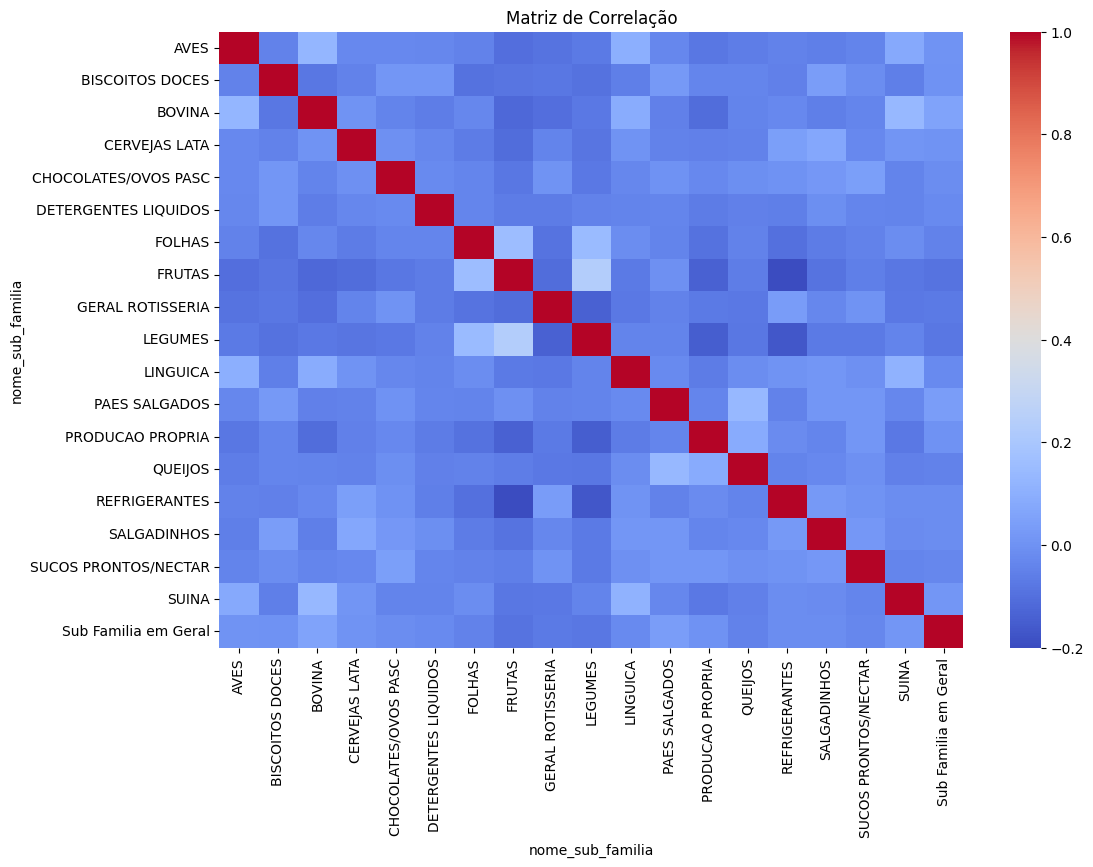

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pivot_normalized_df = pd.DataFrame(df_pivot_normalized, columns=df_pivot_cli.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot_normalized_df.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()


## PCA - Dimensionality Reduction for use in K-Means if needed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

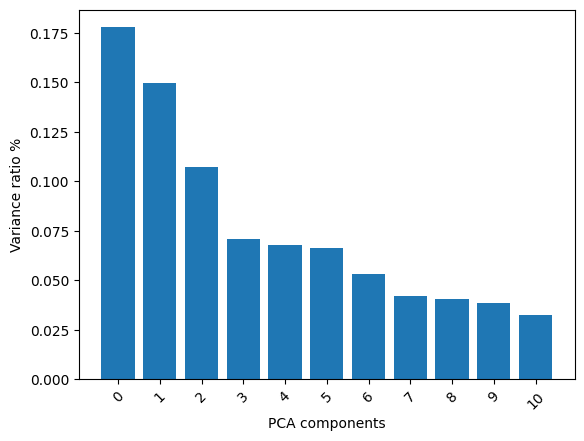

In [36]:
# Decompondo os componentes que serão usados, para verificar a variação nos dados
pca = decomposition.PCA(n_components=n_optimal, random_state=42)
principalComponents = pca.fit_transform(df_pivot_normalized)

# Percentual de variação que foi possível explicar usando o número de componentes em n_optimal
pca.explained_variance_ratio_.sum()

features = range(pca.n_components_)
plt.bar(features, (pca.explained_variance_ratio_))
plt.xlabel('PCA components')
plt.ylabel('Variance ratio %')
plt.xticks(features)
plt.xticks(rotation = 45)

In [37]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,10
0,0.06,-0.12,-0.07,0.03,0.04,-0.06,-0.09,0.11,0.00,-0.08,0.02
1,-0.17,0.09,0.12,-0.12,0.03,-0.07,-0.05,-0.01,-0.01,-0.03,-0.02
2,0.10,-0.11,-0.12,-0.18,-0.18,0.06,0.07,-0.01,0.03,-0.03,-0.01
3,-0.10,0.03,-0.06,0.13,-0.07,0.05,-0.01,0.01,0.11,0.09,0.01
4,0.08,-0.18,0.02,-0.07,0.09,0.21,0.00,0.00,-0.02,0.12,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2821,0.10,0.07,-0.03,-0.00,0.02,-0.00,-0.07,-0.01,0.02,-0.03,-0.03
2822,0.05,0.13,0.00,-0.05,0.07,0.03,-0.08,-0.03,0.01,-0.06,-0.08
2823,-0.02,-0.09,-0.24,0.08,0.12,-0.24,0.21,-0.06,-0.03,-0.08,0.15
2824,-0.07,0.00,-0.02,0.03,0.03,0.06,-0.01,-0.02,-0.01,-0.04,-0.02


### runs k-means and assigns clusters to the original dataset

In [38]:
kmeans = KMeans(n_clusters=n_optimal, init='k-means++', random_state=42)
k_clusters = kmeans.fit_predict(df_pivot_normalized)

df_pivot_normalized = pd.DataFrame(df_pivot_normalized, columns=df_pivot_cli.columns, index=df_pivot_cli.index)

df_pivot_normalized['cluster_id'] = k_clusters
df_pivot_cli['cluster_id'] = df_pivot_normalized['cluster_id']

In [39]:
df_pivot_cli

nome_sub_familia,AVES,BISCOITOS DOCES,BOVINA,CERVEJAS LATA,CHOCOLATES/OVOS PASC,DETERGENTES LIQUIDOS,FOLHAS,FRUTAS,GERAL ROTISSERIA,LEGUMES,LINGUICA,PAES SALGADOS,PRODUCAO PROPRIA,QUEIJOS,REFRIGERANTES,SALGADINHOS,SUCOS PRONTOS/NECTAR,SUINA,Sub Familia em Geral,cluster_id
cpf_cnpj_consumidor,,,,,,,,,,,,,,,,,,,,
00071fafd118afc323db1b1f7a75892b,0.15,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.06,1
003b998d1750a7c1ce7ea9d07dc8fd88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.09,0.00,0.00,3
00557b371f4c6327b5b3a930543e5bdb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,6
005815ee7da8a1f87dfcd0e3846072b2,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.10,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10
0066bc08514f3f4b997076adfa58a55b,0.12,0.00,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.12,0.12,0.12,0.12,0.00,0.00,0.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff5e353526018fba8bc2a34692100e80,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
ff62d35d982b395da1eb98157a359ee2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.17,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
ff99d1b49494ee559a7ab36051b136de,0.25,0.00,0.44,0.00,0.00,0.00,0.00,0.06,0.00,0.12,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.06,0.00,5


#### based on the PCA visualizations, correlation and variance matrix, also regarding the number of dimensions we closed at 19, so we do not need to use dimensionality reduction for KMeans, as previously executed we use the normalized dataframe itself, but if the dataset used shows a number of dimensions above 20 then we can use PCA to reduce the dimensions and apply KMeans as per the example below

In [40]:
# kmeans = KMeans(n_clusters=n_optimal, init='k-means++', random_state=42)
# k_clusters = kmeans.fit_predict(principalComponents) # using PCA components and not the original data


### visualize the clusters in 3D

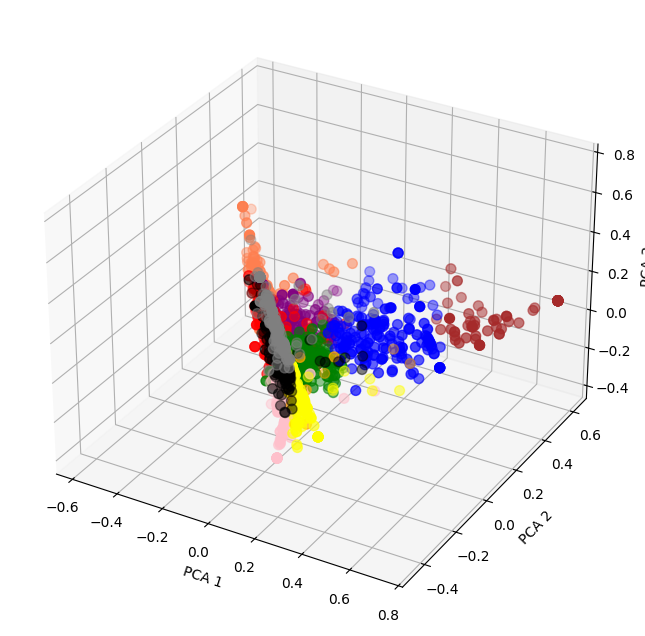

In [41]:
cluster_colors = ['gray', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow', 'black', 'brown', 'coral', 'red']

from mpl_toolkits.mplot3d import Axes3D

# visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_optimal):
    ax.scatter(principalComponents[k_clusters == i, 0], 
               principalComponents[k_clusters == i, 1], 
               principalComponents[k_clusters == i, 2], 
               color=cluster_colors[i], label=f'Cluster {i + 1}', s=50)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

### Plot PCA 2D Clusters

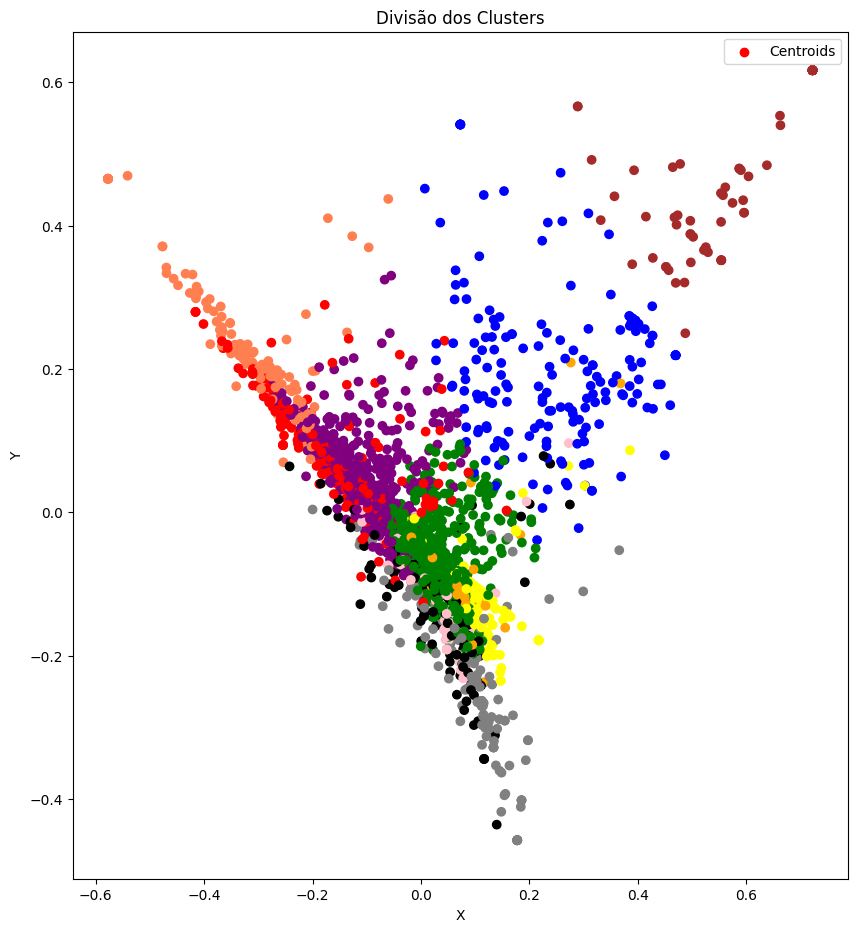

In [42]:
colormap = np.array(cluster_colors)

plt.subplots(figsize=(10, n_optimal))
plt.scatter(principalComponents[:, 0], principalComponents[:,1], c = colormap[kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', label = 'Centroids')
plt.title('Divisão dos Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()

## Assembling the dataframe to join consumer data with their respective identified clusters

In [43]:
kmeans_cluster=df_pivot_cli.copy()
# kmeans_cluster['cluster_id'] = k_clusters # use this line only if principalComponents was used in k-means
kmeans_cluster.reset_index(inplace=True)

# join clusters into their respective consumers that were grouped for further analysis
df_cluster_cli = df_summary_cli.merge(kmeans_cluster[['cpf_cnpj_consumidor','cluster_id']], on = 'cpf_cnpj_consumidor')
df_cluster_cli

,cpf_cnpj_consumidor,nome_sub_familia,quantidade,total,percent_familia,cluster_id
0,00071fafd118afc323db1b1f7a75892b,ALIMENTO CAES,1,33,0.03,1
1,00071fafd118afc323db1b1f7a75892b,AVES,5,33,0.15,1
2,00071fafd118afc323db1b1f7a75892b,BATATAS,1,33,0.03,1
3,00071fafd118afc323db1b1f7a75892b,BISCOITOS DOCES,1,33,0.03,1
4,00071fafd118afc323db1b1f7a75892b,BOVINA,1,33,0.03,1
...,...,...,...,...,...,...
36469,ffc66c24a0fe4faadf5004b4cc826969,CHICLE/GOMA,1,10,0.10,10
36470,ffc66c24a0fe4faadf5004b4cc826969,FRUTAS,1,10,0.10,10
36471,ffc66c24a0fe4faadf5004b4cc826969,ISOTONICOS/ENERGETIC,4,10,0.40,10
36472,ffc66c24a0fe4faadf5004b4cc826969,LEGUMES,3,10,0.30,10


## Proportion of purchase frequency for each cluster

In [44]:
total_clusters = df_cluster_cli['quantidade'].sum()
qtd_compra_cluster=df_cluster_cli.groupby('cluster_id')['quantidade'].sum()
perc_compra_cluster=df_cluster_cli.groupby('cluster_id')['quantidade'].sum() / total_clusters * 100
clientes_cluster=kmeans_cluster.cluster_id.value_counts().sort_index()

df_cliente_compra_cluster = pd.DataFrame(
                   columns=['cluster_id', 'clientes', 'qtd_venda','proporcao','cluster_name'])
df_cliente_compra_cluster['cluster_id']=clientes_cluster.index
df_cliente_compra_cluster['clientes']=clientes_cluster.reset_index()['cluster_id']
df_cliente_compra_cluster['qtd_venda']=qtd_compra_cluster.reset_index()['quantidade']
df_cliente_compra_cluster['proporcao']=perc_compra_cluster.reset_index()['quantidade']
df_cliente_compra_cluster

,cluster_id,clientes,qtd_venda,proporcao,cluster_name
0,0,0,1634,2.14,NaN
1,1,1,33098,43.43,NaN
2,2,2,3339,4.38,NaN
3,3,3,24997,32.80,NaN
4,4,4,426,0.56,NaN
5,5,5,821,1.08,NaN
6,6,6,751,0.99,NaN
7,7,7,1527,2.00,NaN
8,8,8,610,0.80,NaN
9,9,9,2074,2.72,NaN


### put label for clusters

In [45]:

def get_label_cluster(k_index):

    df_cluster_cli_0 = df_cluster_cli[df_cluster_cli['cluster_id'] == k_index][['nome_sub_familia','quantidade']]
    df_cluster_cli_0 = df_cluster_cli_0.groupby(['nome_sub_familia'])['quantidade'].sum().reset_index()
    df_cluster_cli_0['percentage']=df_cluster_cli_0['quantidade'].apply(lambda x: x / df_cluster_cli_0['quantidade'].sum())
    df_cluster_cli_0 = df_cluster_cli_0.sort_values(by=['percentage'], ascending=False)
    df_cluster_cli_0['cluster_id']=k_index
    labels = '{}-{}'.format(df_cluster_cli_0['cluster_id'].values[0],df_cluster_cli_0['nome_sub_familia'][0:3].str.cat(sep=','))

    return labels



In [46]:
df_cluster_proporcao = pd.DataFrame(columns = df_cliente_compra_cluster.columns)

for i, k in df_cliente_compra_cluster.iterrows():
   k['cluster_name'] = get_label_cluster(k['cluster_id'])
   df_cluster_proporcao = pd.concat([df_cluster_proporcao, pd.DataFrame([k])], ignore_index=True)

df_cluster_proporcao

,cluster_id,clientes,qtd_venda,proporcao,cluster_name
0,0,0,1634,2.14,"0-PRODUCAO PROPRIA,FRUTAS,REFRIGERANTES"
1,1,1,33098,43.43,"1-FRUTAS,LEGUMES,PRODUCAO PROPRIA"
2,2,2,3339,4.38,"2-GERAL ROTISSERIA,FRUTAS,PRODUCAO PROPRIA"
3,3,3,24997,32.80,"3-FRUTAS,LEGUMES,FOLHAS"
4,4,4,426,0.56,"4-SALGADINHOS,REFRIGERANTES,FRUTAS"
5,5,5,821,1.08,"5-BOVINA,AVES,SUINA"
6,6,6,751,0.99,"6-REFRIGERANTES,BOVINA,CERVEJAS LATA"
7,7,7,1527,2.00,"7-QUEIJOS,PRODUCAO PROPRIA,FRUTAS"
8,8,8,610,0.80,"8-GERAL ROTISSERIA,REFRIGERANTES,FRUTAS"
9,9,9,2074,2.72,"9-FRUTAS,LEGUMES,FOLHAS"


In [47]:
# quando o k-means rodou usando a base de quantidade e não frequencia de compra
df_cluster_proporcao.to_csv('./dataset/clusters_proprocao.csv',index=False)

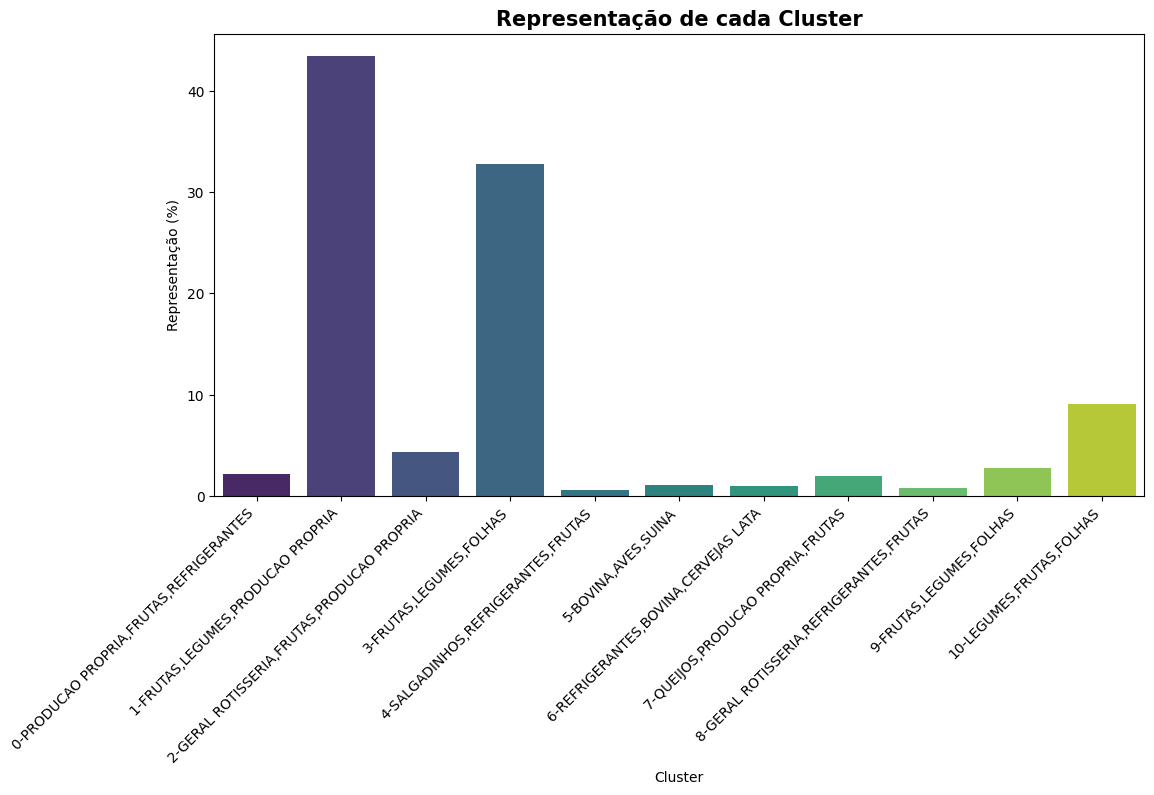

In [48]:
plt.figure(figsize=(12, 6))
df_cliente_compra_cluster_viz = sns.barplot(
    data=df_cluster_proporcao,
    x="cluster_name",
    y="proporcao",
    palette="viridis" 
)

# Orientacao do eixo X
df_cliente_compra_cluster_viz.set_xticklabels(
    df_cliente_compra_cluster_viz.get_xticklabels(), rotation=45, ha="right"
)

df_cliente_compra_cluster_viz.set(
    xlabel="Cluster",
    ylabel="Representação (%)",
    title="Representação de cada Cluster"
)

# Ajustando o título com fonte maior e negrito
df_cliente_compra_cluster_viz.title.set_fontsize(15)
df_cliente_compra_cluster_viz.title.set_weight("bold")

# Exibir o gráfico
plt.show()

In [49]:
df_cluster_cli_export =df_cluster_cli.copy()
df_cluster_cli_export['percent_familia']=df_cluster_cli_export['percent_familia'].apply(lambda x: x * 100)

df_cluster_name = df_cluster_cli_export.merge(df_cluster_proporcao[['cluster_id','cluster_name']], on='cluster_id')
#df_cluster_name.to_csv('clusters_consum_detail.csv', index=False)

df_cluster_name.to_csv('./dataset/clusters_consum_detail.csv', index=False)
df_cluster_name['cluster_name']

# export cluster_name to array
arr_labels = df_cluster_name['cluster_name'].unique()

In [50]:
df_labels_cluster = pd.DataFrame({'cluster_name': arr_labels})
df_labels_cluster.to_csv('./dataset/labels_clusters.csv', index=False)

### demonstration of the subcategories of each clusters

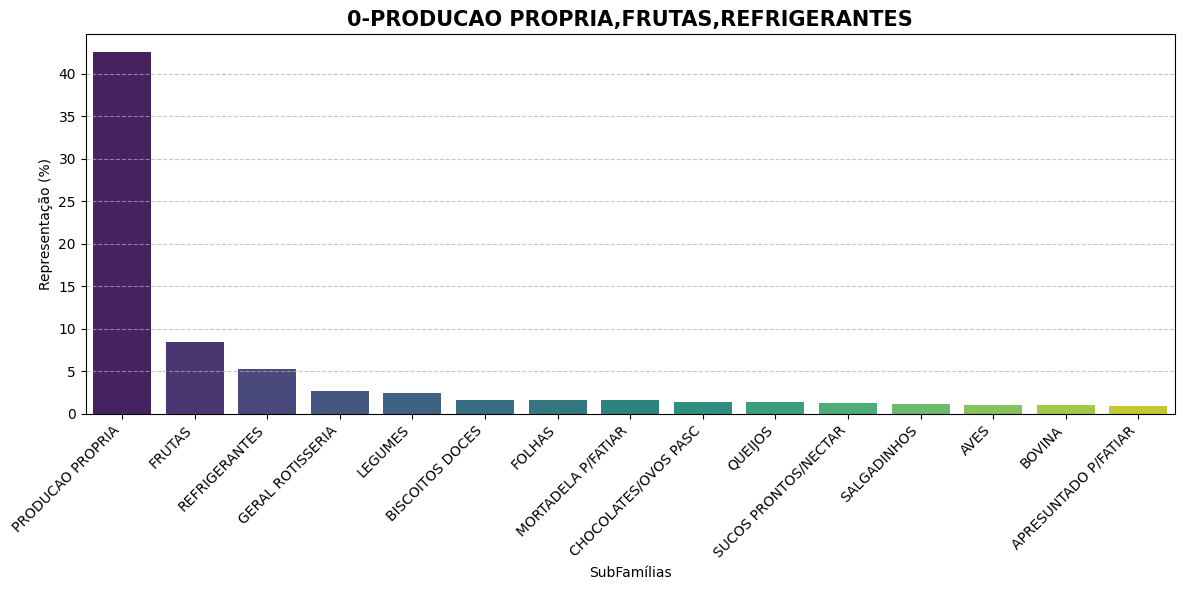

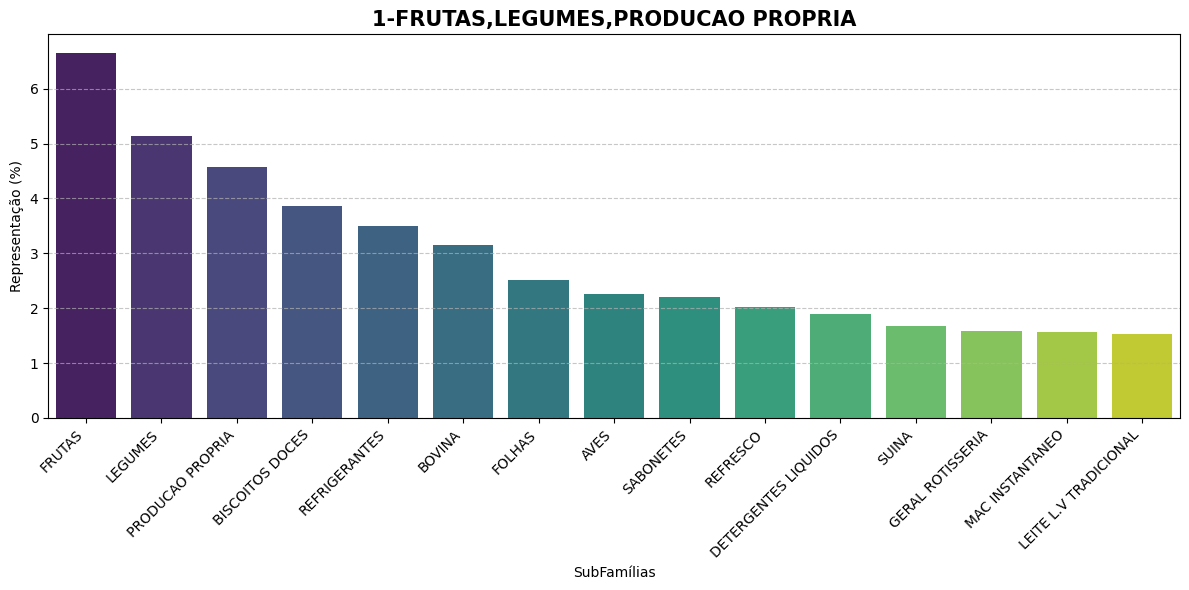

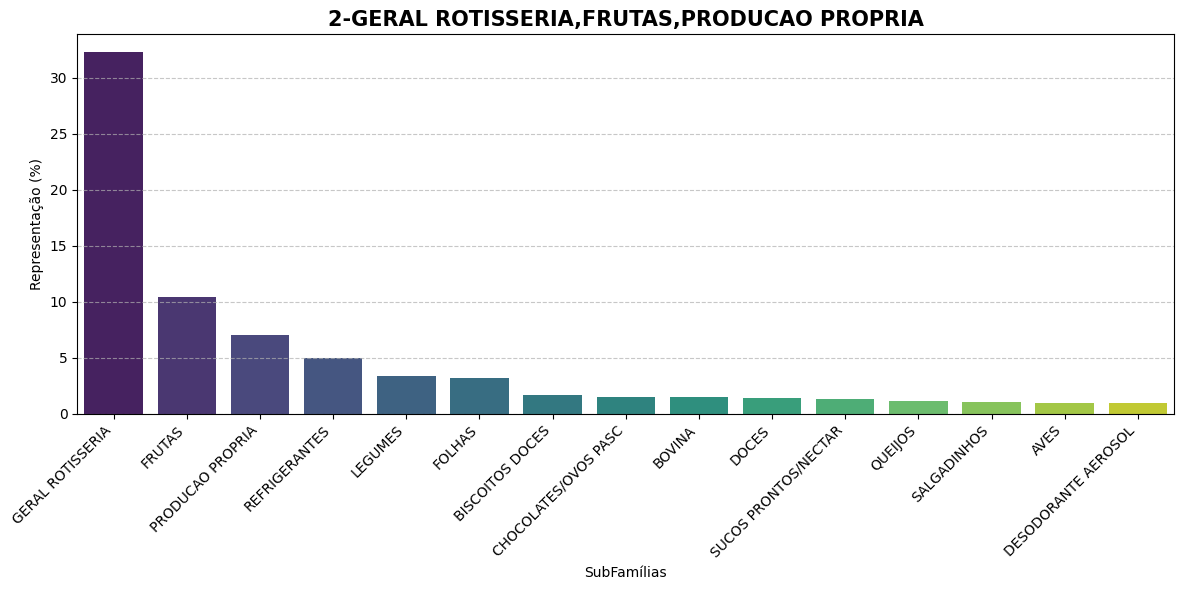

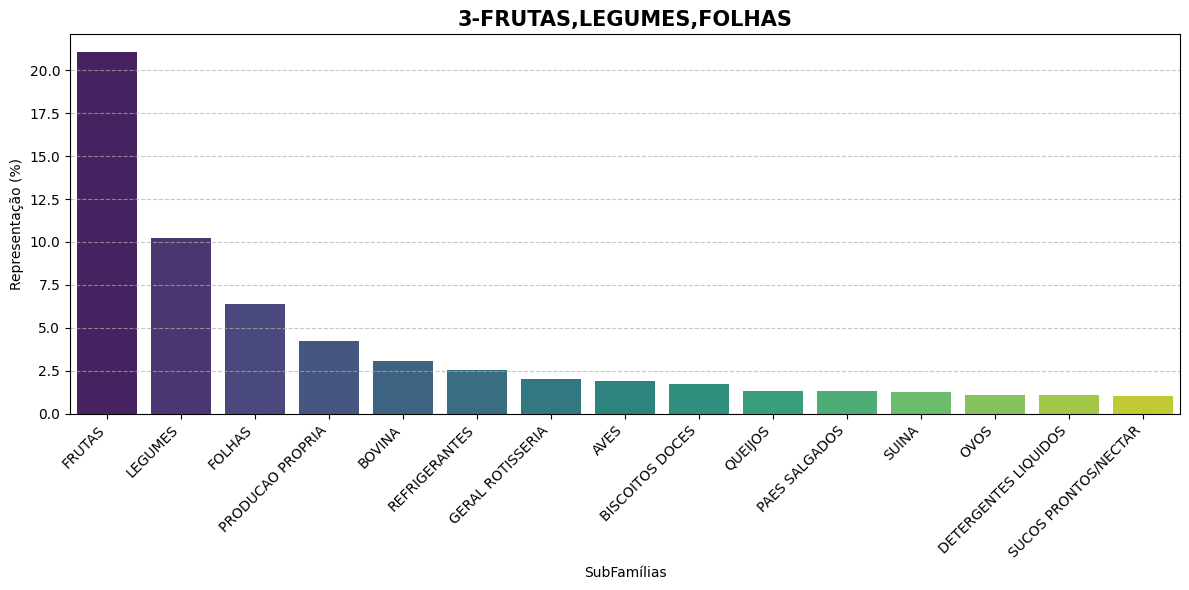

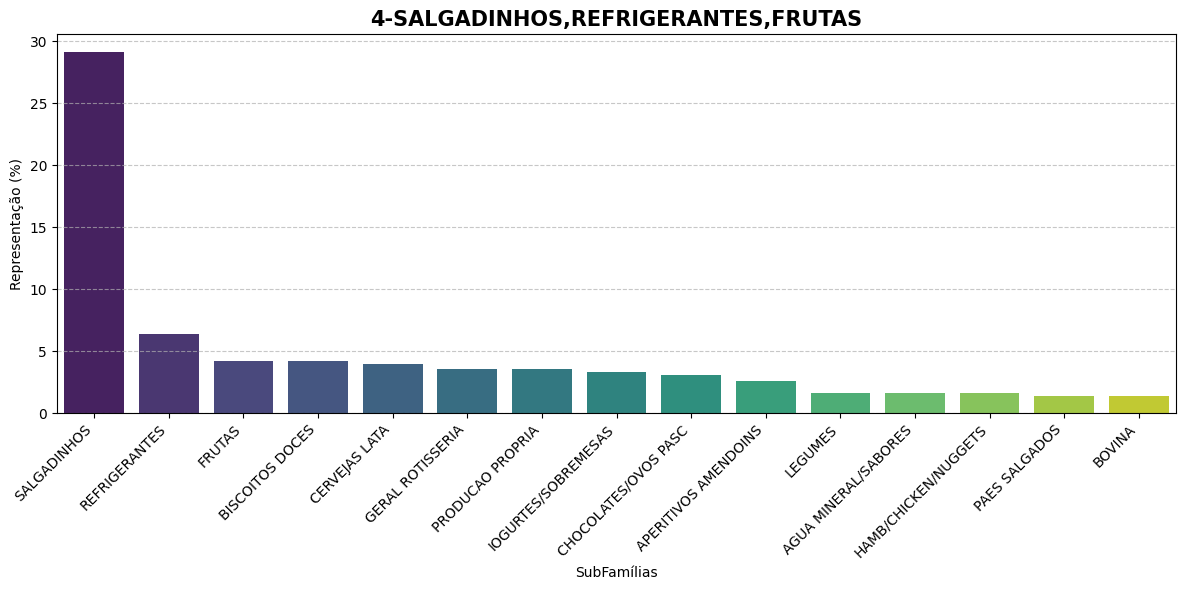

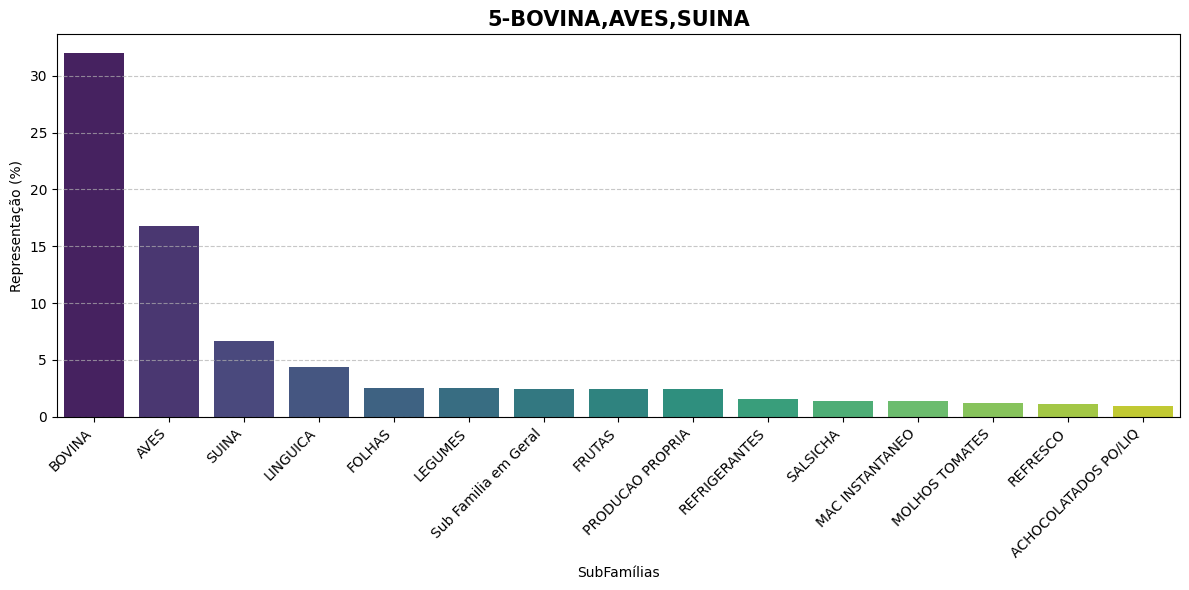

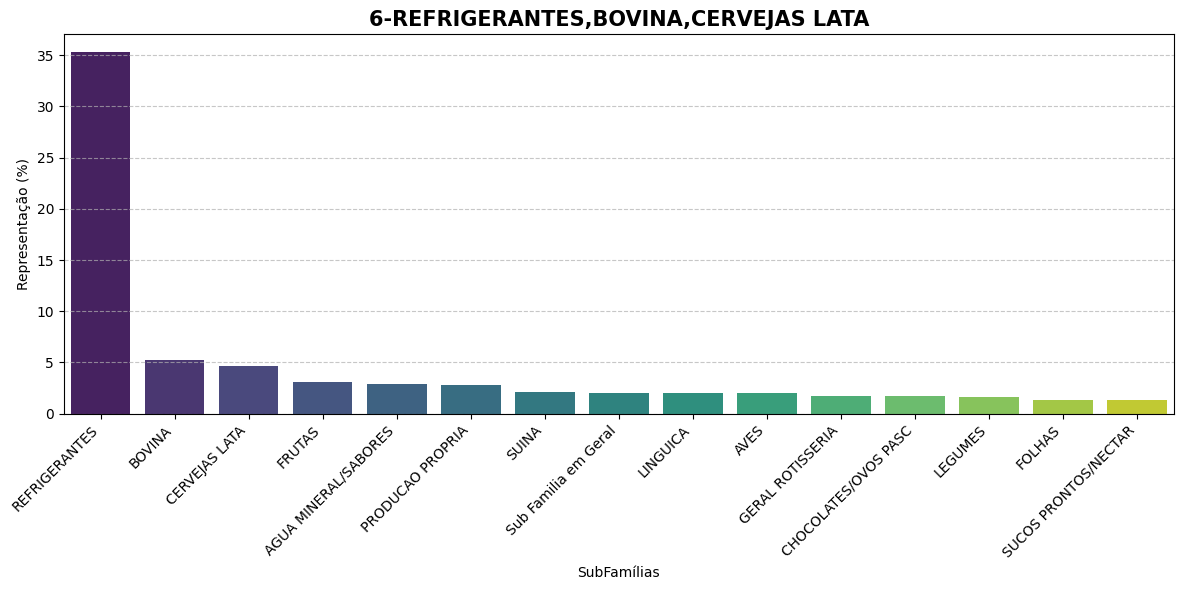

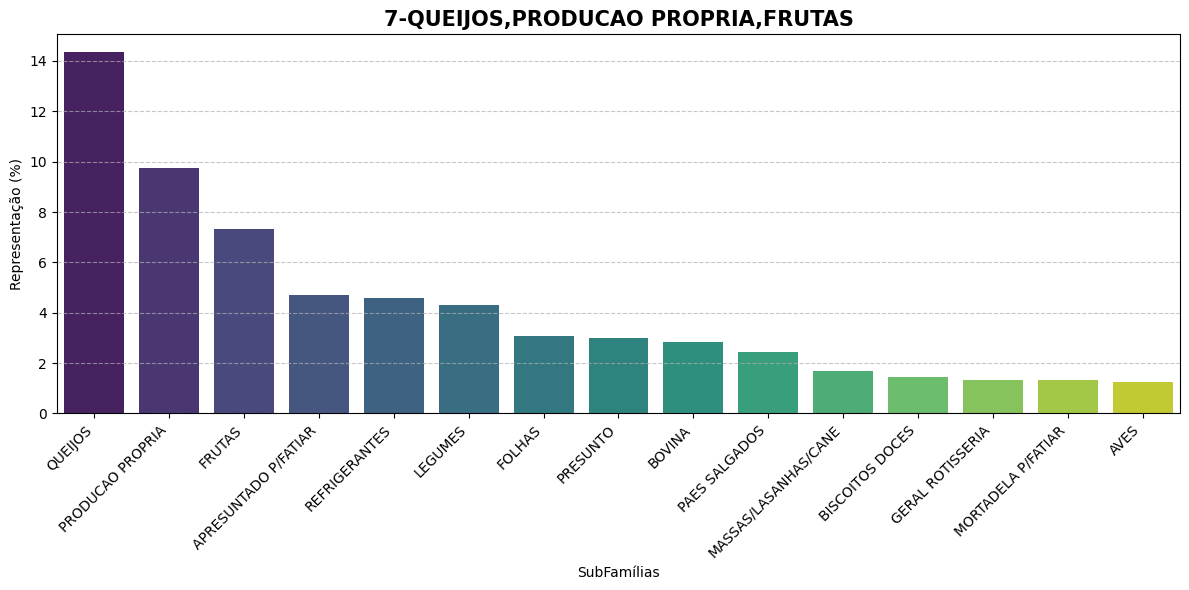

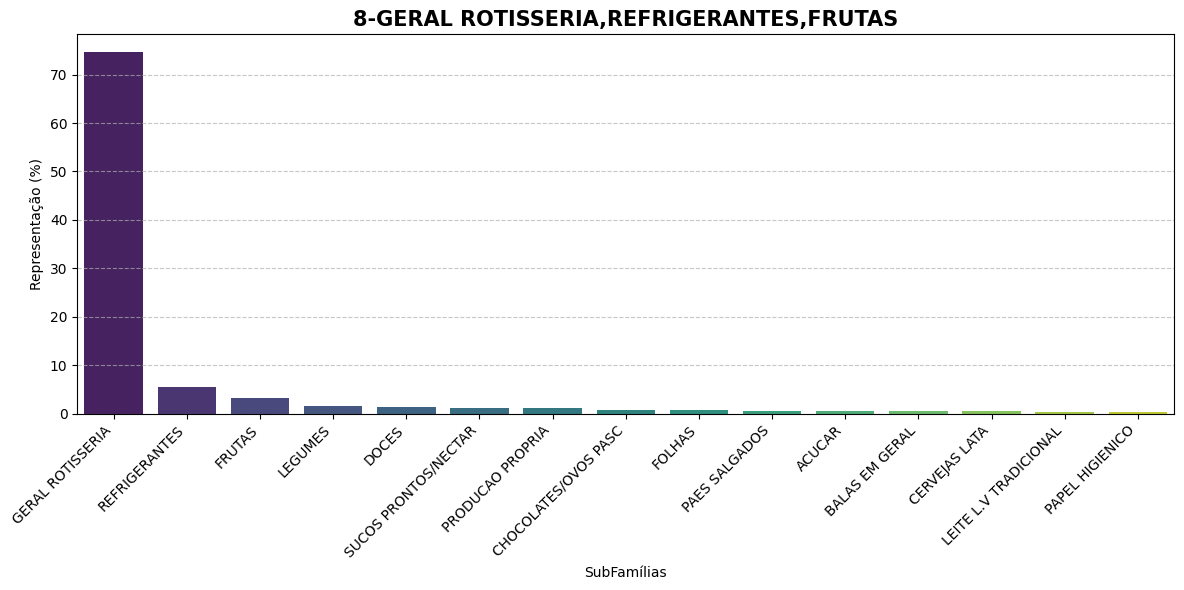

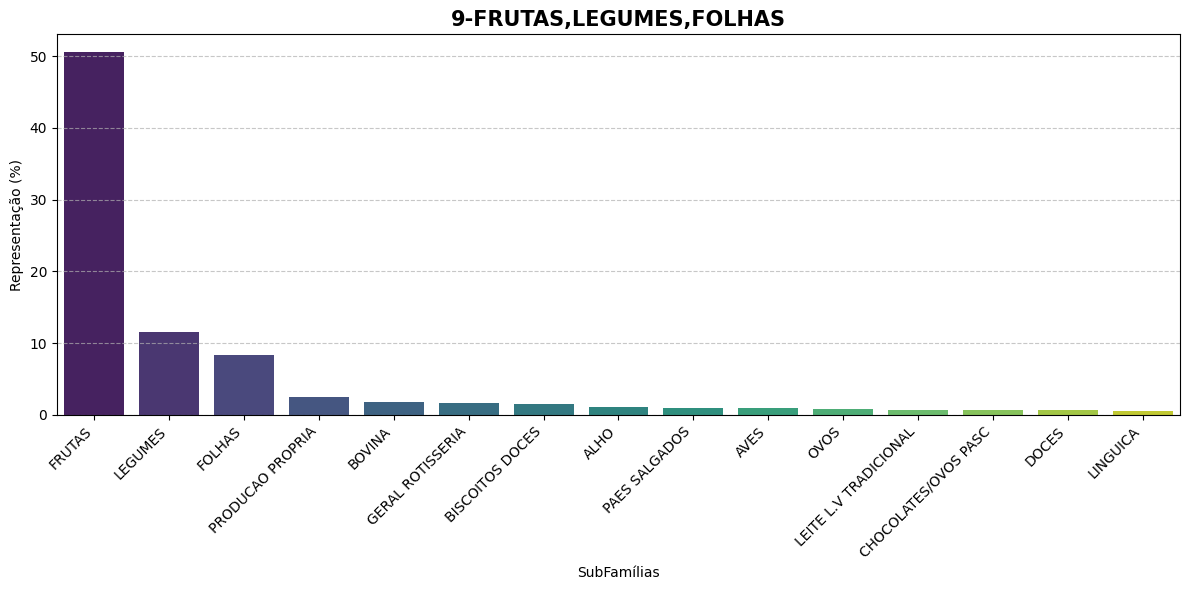

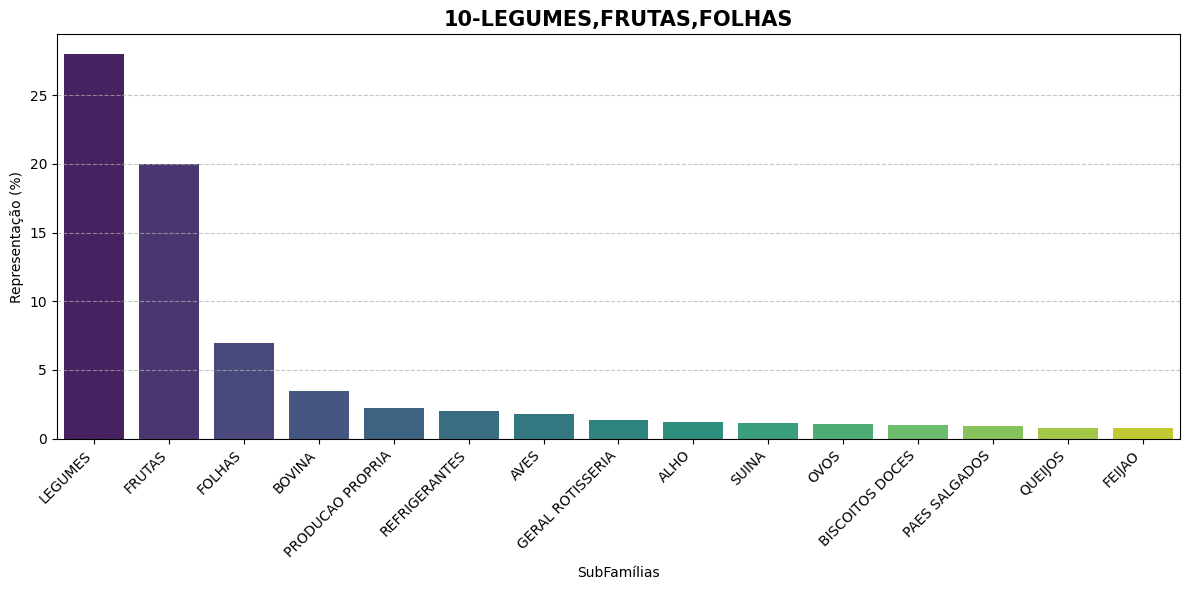

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster(df_cluster, cluster):
    plt.figure(figsize=(12, 6))  

    # paleta viridis para barras com cores diferentes
    df_cluster_cli_viz = sns.barplot(data=df_cluster,
                                     x="nome_sub_familia", 
                                     y="percent_familia", 
                                     palette="viridis")

    # colocando rotulos dos subfamilias em 45 graus
    df_cluster_cli_viz.set_xticklabels(df_cluster_cli_viz.get_xticklabels(), rotation=45, ha='right')
    df_cluster_cli_viz.set(xlabel="SubFamílias", ylabel="Representação (%)")

    # formatacao do titulo
    label_graph = df_cluster_proporcao[df_cluster_proporcao['cluster_id'] == cluster]['cluster_name'].values
    label_graph = label_graph[0] if len(label_graph) > 0 else f"Cluster {cluster}"

    df_cluster_cli_viz.set_title(label_graph, weight="bold", fontsize=15)

     # adicionando grid para melhor visualização
    plt.grid(axis="y", linestyle="--", alpha=0.7) 
    # Ajusta os elementos para evitar sobreposição
    plt.tight_layout()  
    plt.show()

def mount_df_cluster(arr_clusters, num_familia):
    for k in arr_clusters:
        df_cluster_cli_0 = df_cluster_name[df_cluster_name['cluster_id'] == k][['nome_sub_familia', 'quantidade']]

        # Agrupando e calculando percentuais
        df_cluster_cli_0 = df_cluster_cli_0.groupby(['nome_sub_familia'])['quantidade'].sum().reset_index()
        df_cluster_cli_0['percent_familia'] = df_cluster_cli_0['quantidade'] / df_cluster_cli_0['quantidade'].sum() * 100
        df_cluster_cli_0 = df_cluster_cli_0.sort_values(by=['percent_familia'], ascending=False)

        # Pegando apenas as principais subfamílias
        df_cluster_cli_0 = df_cluster_cli_0.head(num_familia)
        df_cluster_cli_0['cluster_id'] = k

        plot_cluster(df_cluster_cli_0, k)


mount_df_cluster(range(n_optimal), 15)


## Export grouped data to cluester viz by subfamily

In [52]:
import pandas as pd

def get_df_cluster_by_subfamilia(df_cluster_consum, arr_clusters, num_familia):
    df_list = [] 

    for k in arr_clusters:
        df_cluster_cli_0 = df_cluster_consum[df_cluster_consum['cluster_id'] == k][['nome_sub_familia', 'quantidade']]
        df_cluster_cli_0 = df_cluster_cli_0.groupby(['nome_sub_familia'])['quantidade'].sum().reset_index()
        df_cluster_cli_0['percent_familia'] = df_cluster_cli_0['quantidade'] / df_cluster_cli_0['quantidade'].sum() * 100
        df_cluster_cli_0 = df_cluster_cli_0.sort_values(by=['percent_familia'], ascending=False)
        df_cluster_cli_0['cluster_id'] = k
        df_cluster_cli_0 = df_cluster_cli_0.head(num_familia) 

        df_list.append(df_cluster_cli_0)  

    df_response = pd.concat(df_list, ignore_index=True)

    # merge com os nomes dos clusters
    df_response = df_response.merge(df_cluster_proporcao[['cluster_id', 'cluster_name']], on='cluster_id')

    return df_response

df_cluster_viz = get_df_cluster_by_subfamilia(df_cluster_cli, range(n_optimal), 20)

df_cluster_viz.to_csv('./dataset/cluster_by_subfamilia.csv', index=False)
